In [14]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.plotly as py
%matplotlib inline
import seaborn as sns
sns.set()

In [16]:
df = pd.read_csv('CR2016-17AverageAQI.csv', skiprows=0)
df.head()

,S.No,FromDate,Average AQI
0,1,01-Jan-2016 - 00:00,70.10
1,2,02-Jan-2016 - 00:00,79.38
2,3,03-Jan-2016 - 00:00,84.83
3,4,04-Jan-2016 - 00:00,80.70
4,5,05-Jan-2016 - 00:00,82.98


In [17]:
df.FromDate = pd.to_datetime(df.FromDate)
df.set_index('FromDate', inplace=True)

In [18]:
df.head()

,S.No,Average AQI
FromDate,,
2016-01-01,1,70.10
2016-01-02,2,79.38
2016-01-03,3,84.83
2016-01-04,4,80.70
2016-01-05,5,82.98


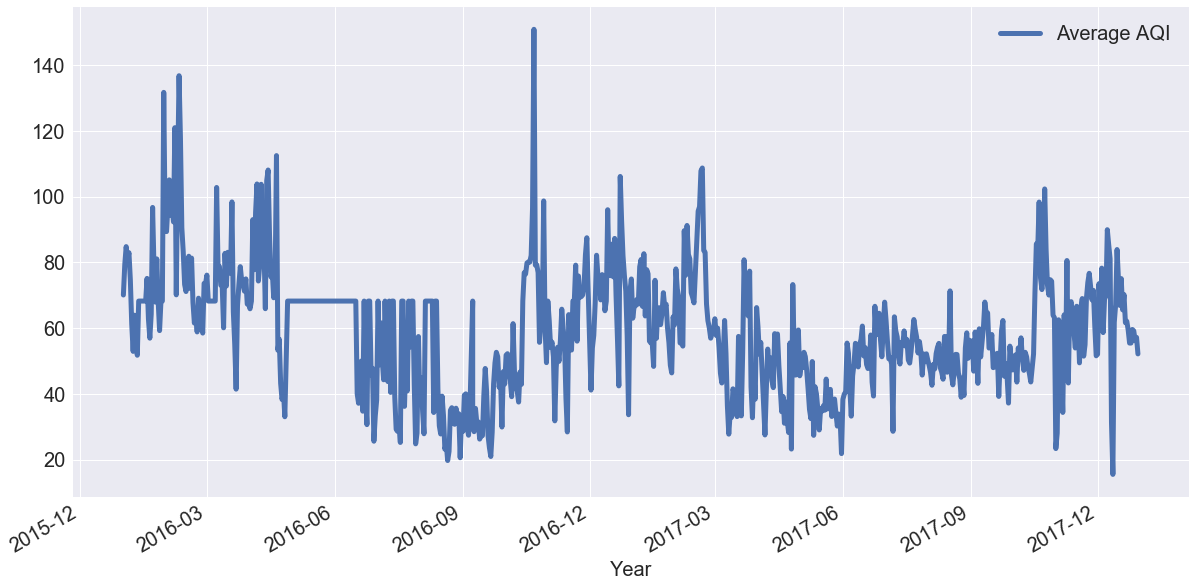

In [27]:
df['Average AQI'].plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.legend(fontsize=20)

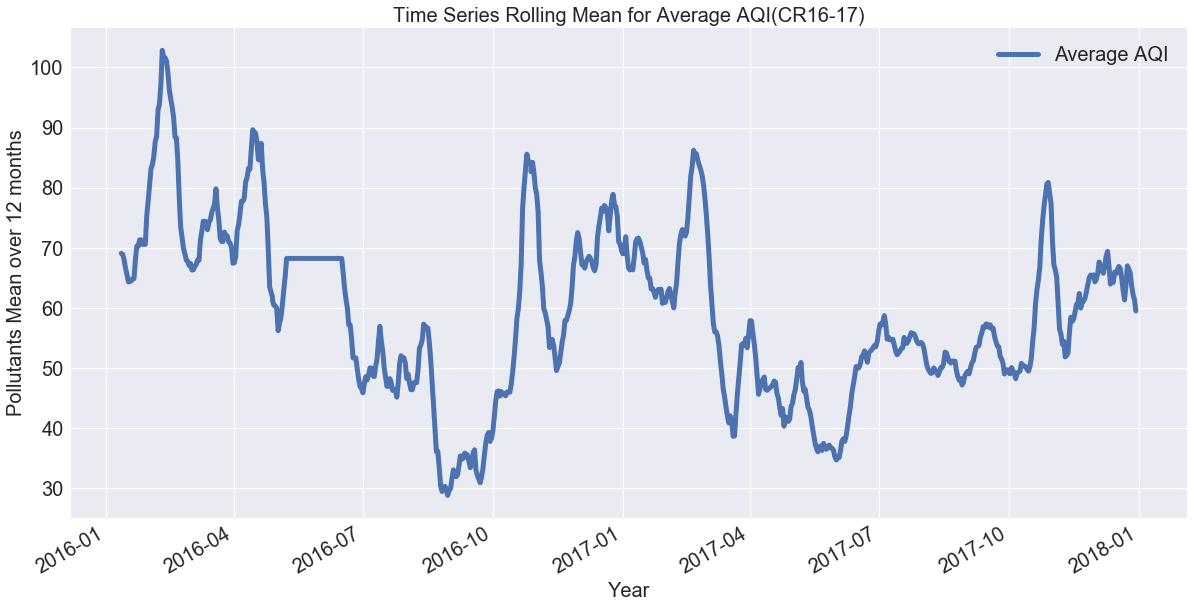

In [29]:
AVGAQI = df[['Average AQI']]
AVGAQI.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.ylabel('Pollutants Mean over 12 months', fontsize=20)
plt.title('Time Series Rolling Mean for Average AQI(CR16-17)', fontsize=20)
plt.legend(fontsize=20)

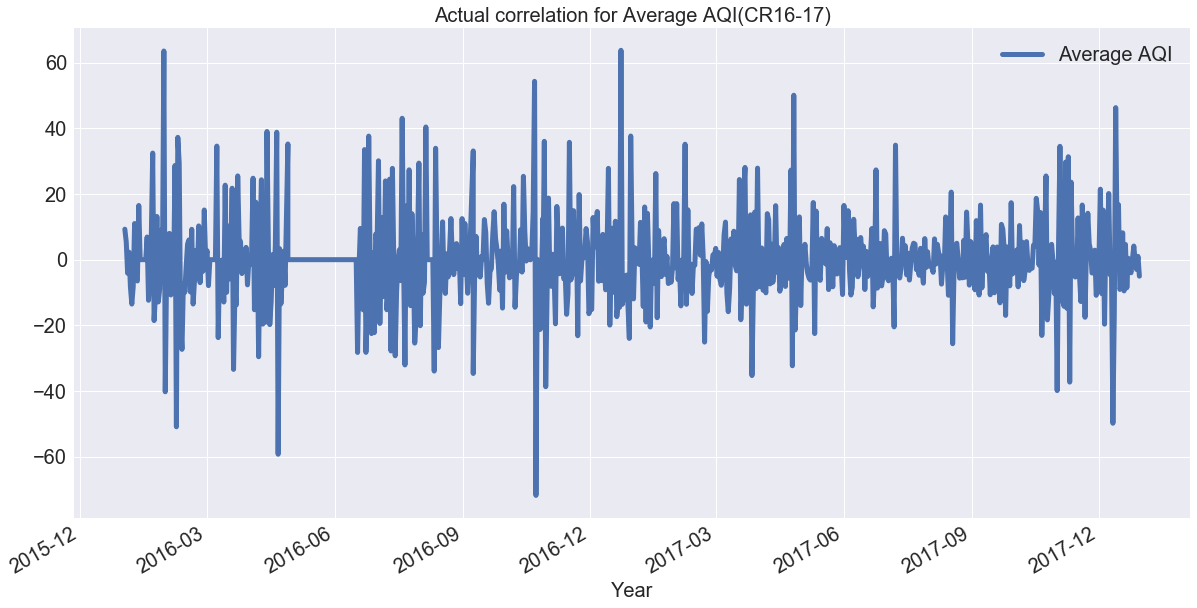

In [36]:
AVGAQI.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);
plt.title('Actual correlation for Average AQI(CR16-17)', fontsize=20)
plt.legend(fontsize=20)

In [42]:
from statsmodels.tsa.arima_model import ARIMA

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



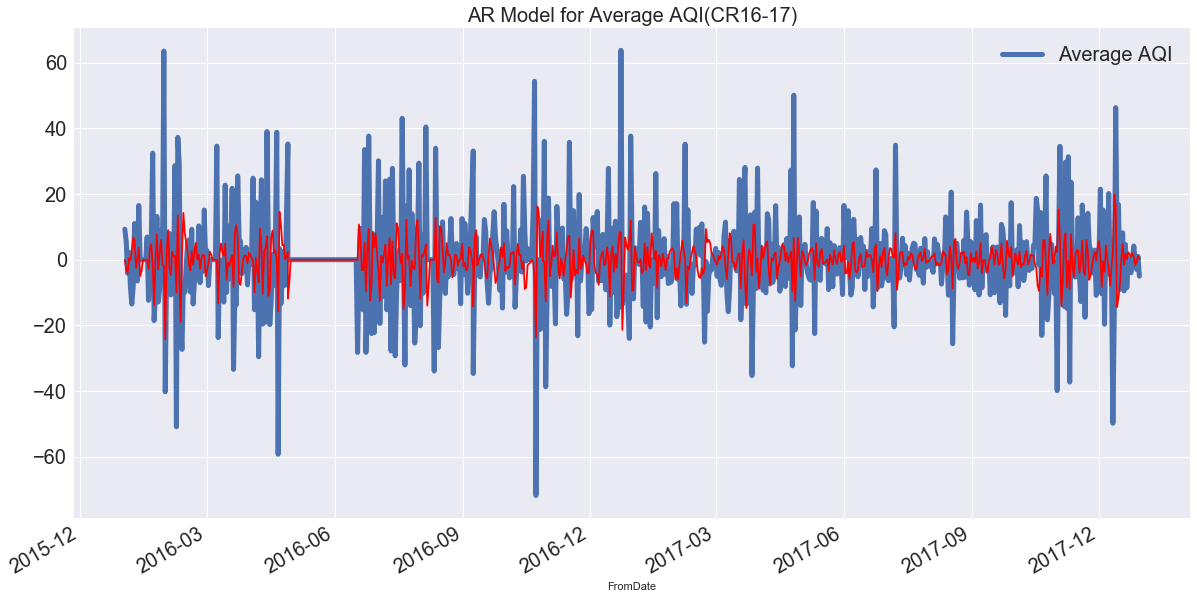

In [57]:
#AR Model
model = ARIMA(AVGAQI, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
AVGAQI.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR for Average AQI(CR16-17)', fontsize=20)
plt.legend(fontsize=20)
#plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



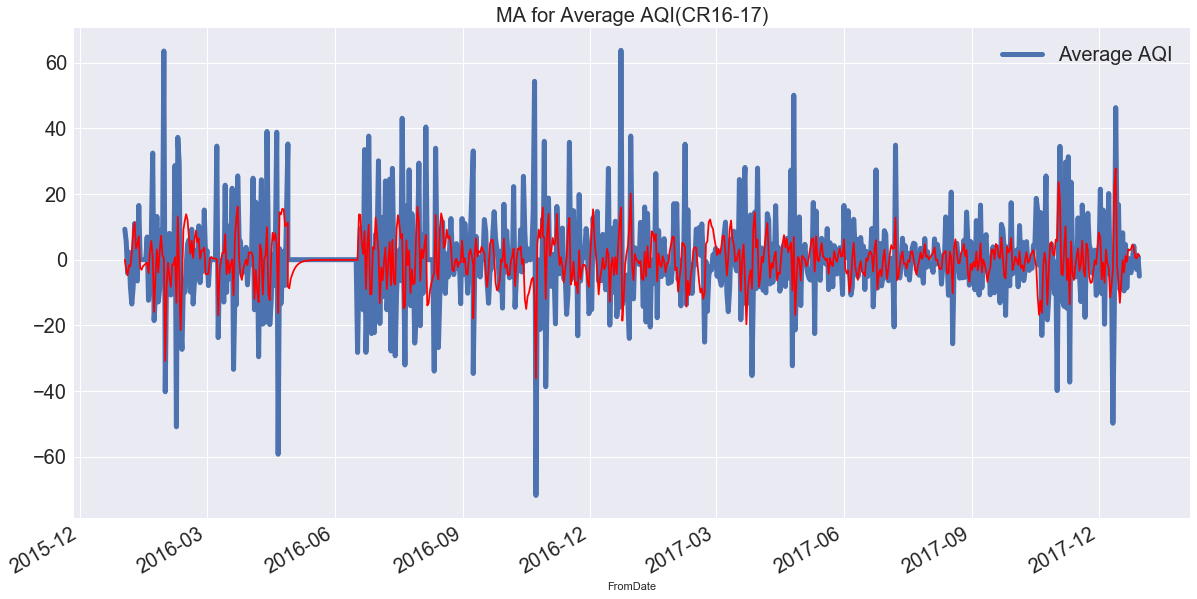

In [83]:
model = ARIMA(AVGAQI, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)
AVGAQI.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('MA for Average AQI(CR16-17)', fontsize=20)
plt.legend(fontsize=20)
#plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



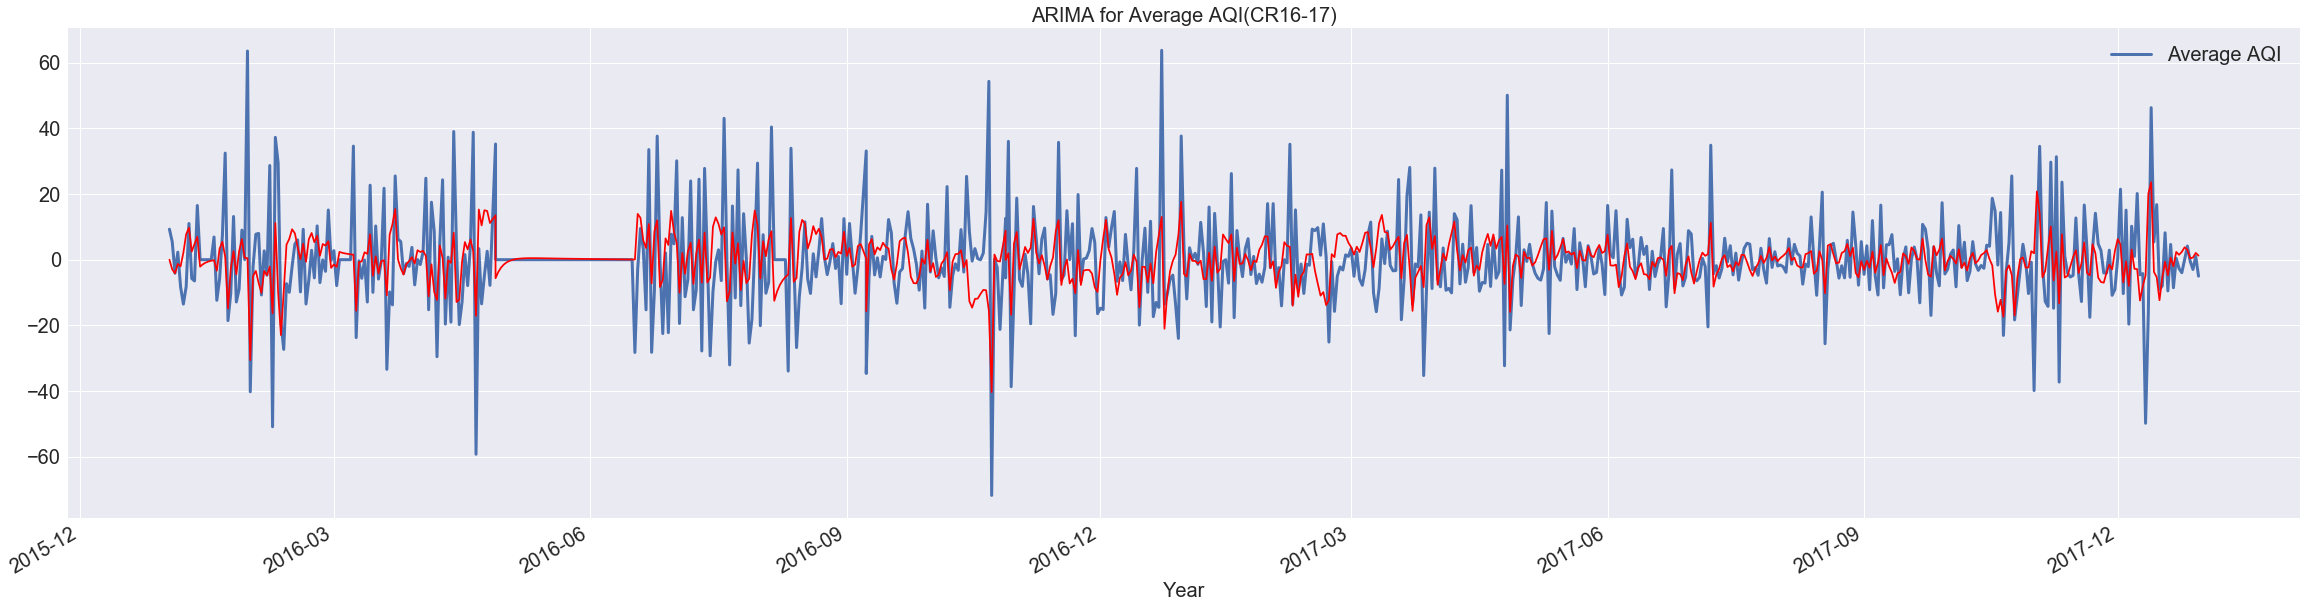

In [81]:
model = ARIMA(AVGAQI, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
AVGAQI.diff().plot(figsize=(40,10), linewidth=3, fontsize=20)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('ARIMA for Average AQI(CR16-17)', fontsize=20)
plt.legend(fontsize=20)
plt.xlabel('Year', fontsize=20);
#plt.title('Time Series Arima'% sum((results_ARIMA.fittedvalues-AVGAQI)**2))